In [155]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [156]:
data = pd.read_csv('admission.csv')
x1 = data.values[:,0].reshape(-1,1)
x2 = data.values[:,1].reshape(-1,1)

y = data.values[:,2]

X = np.concatenate([x1,x2],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12345)








In [157]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    col = []
    
    for i in range(len(X)):
        dist = np.sum(np.abs(X[i] - example))
        pair = (dist,y[i])
        col.append(pair)
    
    sorted_col = sorted(col,key = lambda x: x[0])
    k_first_elems = sorted_col[:k]

    pos = 0
    neg = 0

    for p in k_first_elems:
        if p[1] == 1:
            pos += 1
        else:
            neg += 1
    
    if pos>neg:
        return 1
    return 0

        

    

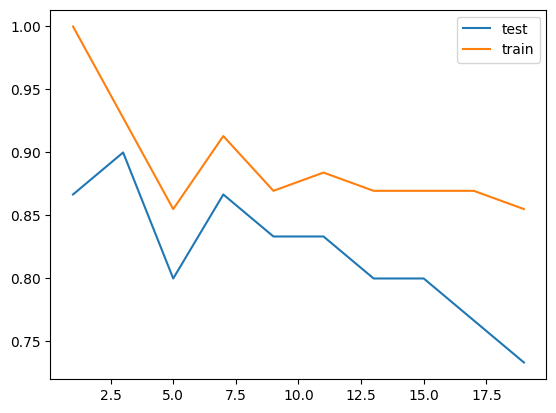

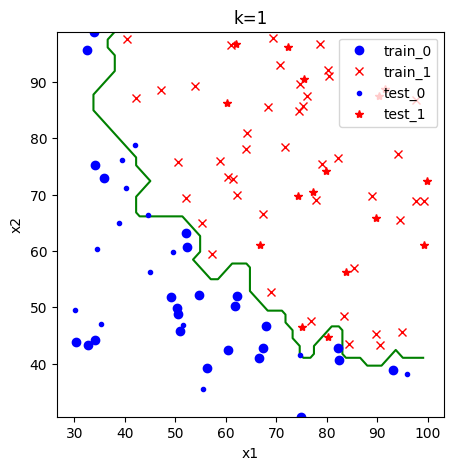

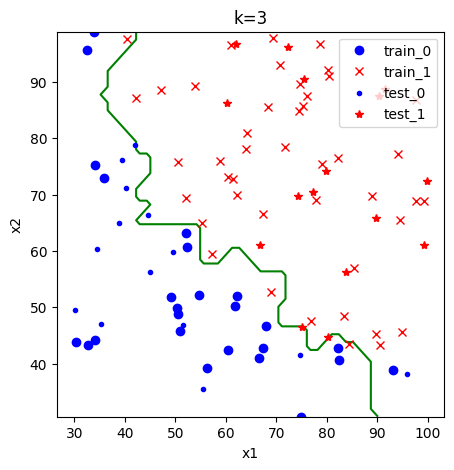

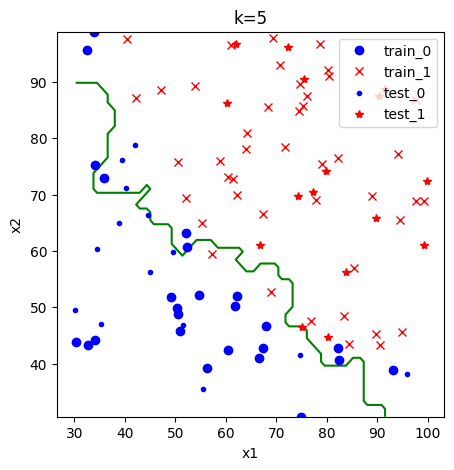

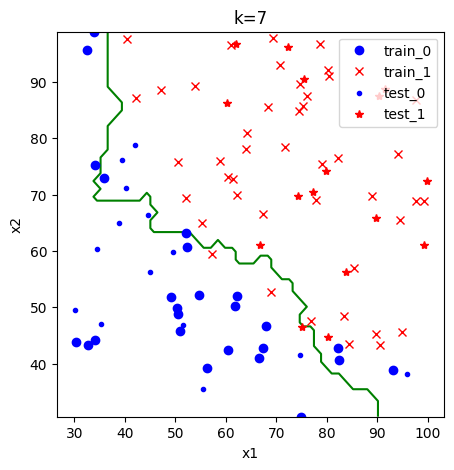

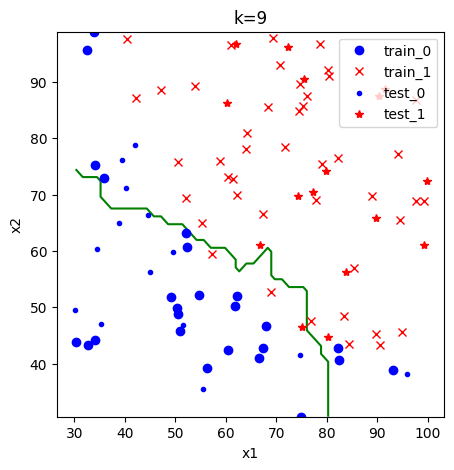

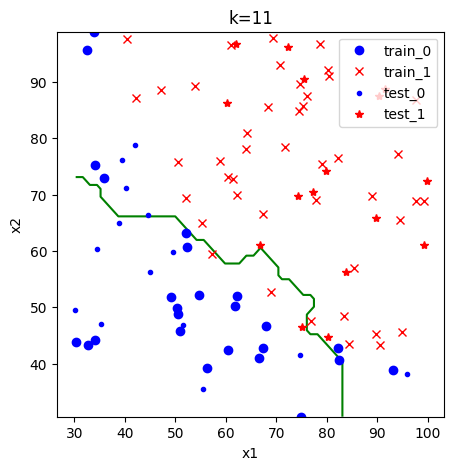

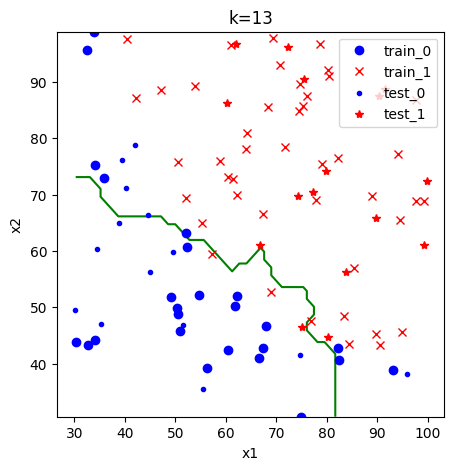

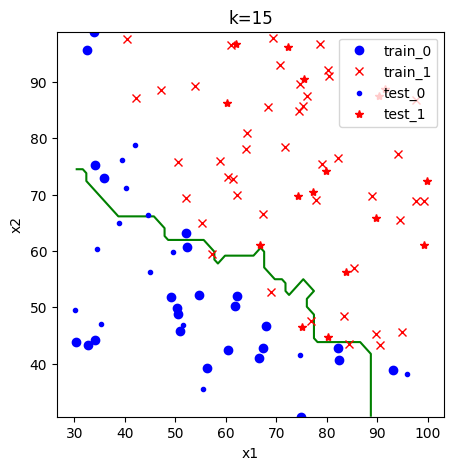

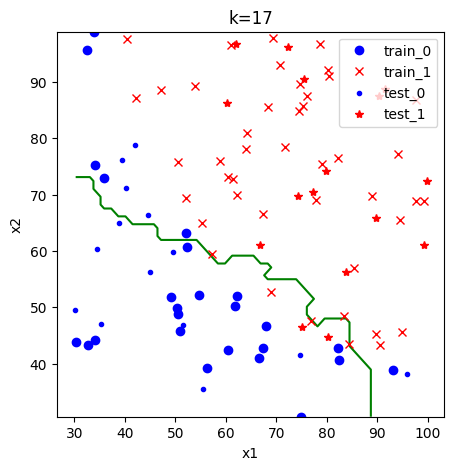

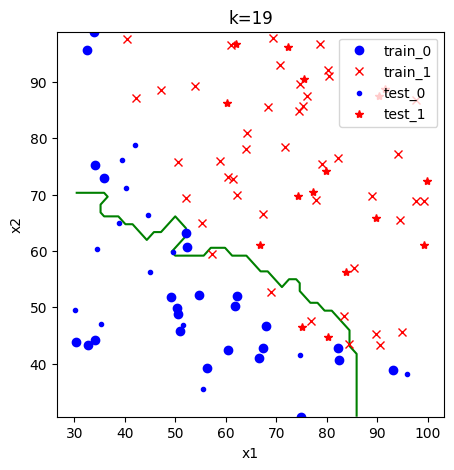

In [165]:
y_predsk_test = []
y_predsk_train = []
for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
    y_predsk_test.append(y_pred)
    
    y_pred = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
    y_predsk_train.append(y_pred)

k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] 
accs_test = []   
for i in range(len(y_predsk_test)):
    y_pred = np.array(y_predsk_test[i])

    y_train_np = np.array(y_test)

    acc = np.mean(y_pred == y_train_np)
    accs_test.append(acc)
accs_train = []

for i in range(len(y_predsk_train)):
    y_pred = np.array(y_predsk_train[i])

    y_train_np = np.array(y_train)

    acc = np.mean(y_pred == y_train_np)
    accs_train.append(acc)
    
plt.plot(k,accs_test,k,accs_train)
plt.legend(['test','train'])

plt.show()

for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:

    # setup plot
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
 
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
       for col_idx in range(x1_res):
           example = np.array([x1[col_idx], x2[row_idx]])
           pred = classify(x_train, y_train, example, k)
           labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
 
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
 
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
 
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])


In [159]:
y_pred = np.zeros(y_test.shape)
for example_idx, example in enumerate(x_test):
    pred = classify(x_train, y_train, example, 3)
    y_pred[example_idx] = pred

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[11  3]
 [ 0 16]]


In [160]:
raport = np.zeros((2,3))

for i in range(2):
    TP = conf_matrix[i][i]
    FN = 0
    FP = 0
    TN = 0
    
    # Obliczamy FN, FP i TN
    for j in range(2):
        if i != j: 
            FP += conf_matrix[j][i]  # False Positives: inne klasy sklasyfikowane jako 'i'
            FN += conf_matrix[i][j]  # False Negatives: przypadki klasy 'i' sklasyfikowane błędnie

    
    se = TP / (TP + FN) if TP + FN != 0 else 0
    
  
    pp = TP / (TP + FP) if TP + FP != 0 else 0

   
    
    raport[i] = [i, se, pp]

se = (raport[0][1] + raport[1][1] )/2
pp = (raport[0][2] + raport[1][2] )/2


y_train_np = np.array(y_test)

acc = np.mean(y_pred == y_train_np)


rapt = [3,acc,se,pp]
print("k | acc | se | pp")
print(rapt)



k | acc | se | pp
[3, np.float64(0.9), np.float64(0.8928571428571428), np.float64(0.9210526315789473)]


In [161]:
k = 3
knn_classifier = KNeighborsClassifier(k)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

rep = classification_report(y_test,y_pred)


raport = np.zeros((2,3))

for i in range(2):
    TP = conf_matrix[i][i]
    FN = 0
    FP = 0
    TN = 0
    
    # Obliczamy FN, FP i TN
    for j in range(2):
        if i != j: 
            FP += conf_matrix[j][i]  # False Positives: inne klasy sklasyfikowane jako 'i'
            FN += conf_matrix[i][j]  # False Negatives: przypadki klasy 'i' sklasyfikowane błędnie

    
    se = TP / (TP + FN) if TP + FN != 0 else 0
    
  
    pp = TP / (TP + FP) if TP + FP != 0 else 0

   
    
    raport[i] = [i, se, pp]

se = (raport[0][1] + raport[1][1] )/2
pp = (raport[0][2] + raport[1][2] )/2


y_train_np = np.array(y_test)

acc = np.mean(y_pred == y_train_np)


rapt = [3,acc,se,pp]
print("cls | acc | se | pp")
print(rapt)

cls | acc | se | pp
[3, np.float64(0.9333333333333333), np.float64(0.9330357142857143), np.float64(0.9330357142857143)]


In [162]:
from sklearn.datasets import load_digits
 
data = load_digits()
y = data['target']
x = data['data']



In [163]:

for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    rep = classification_report(y_test,y_pred)
    print(f"Dla k = {k}")
    print(rep)

Dla k = 1
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

Dla k = 3
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Dla k = 5
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87 

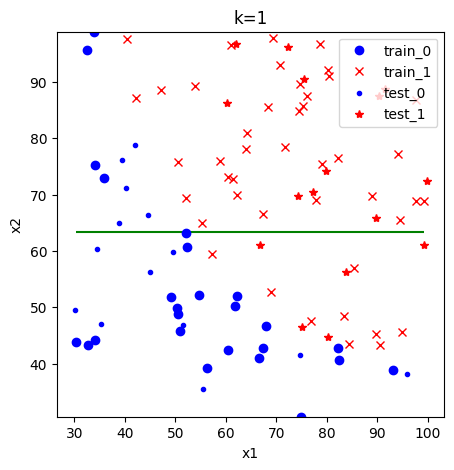

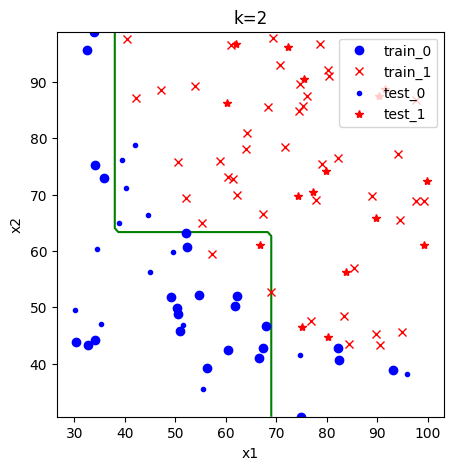

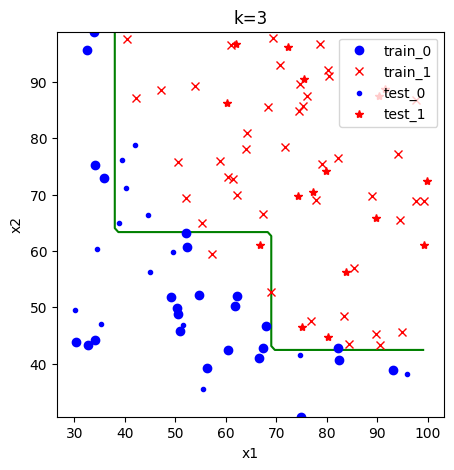

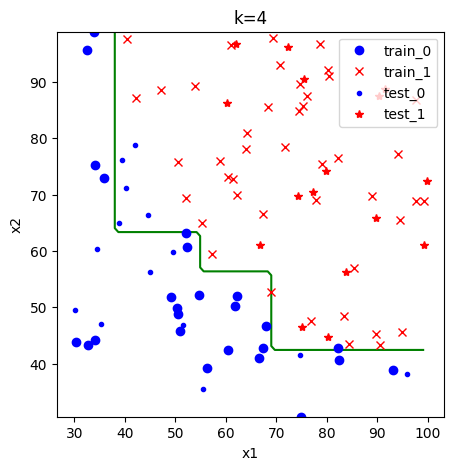

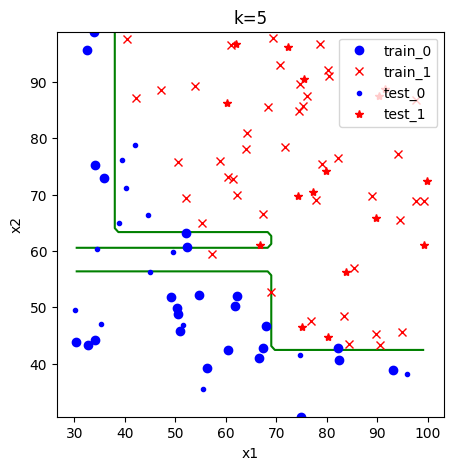

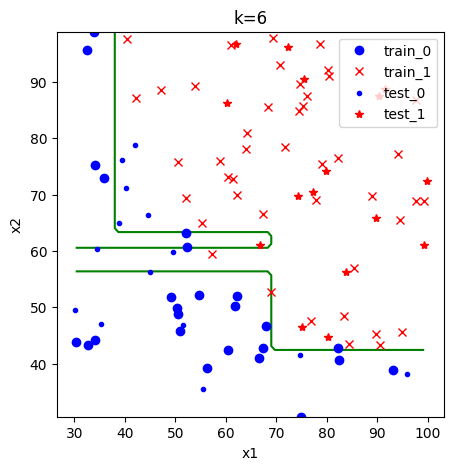

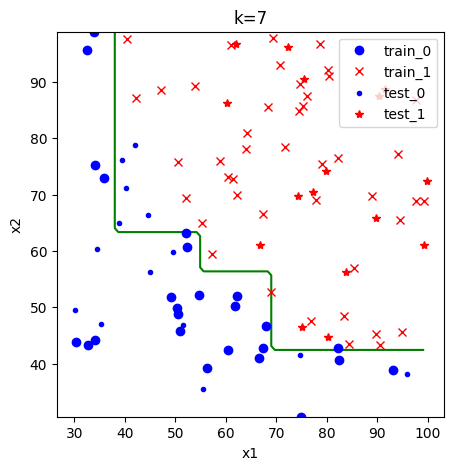

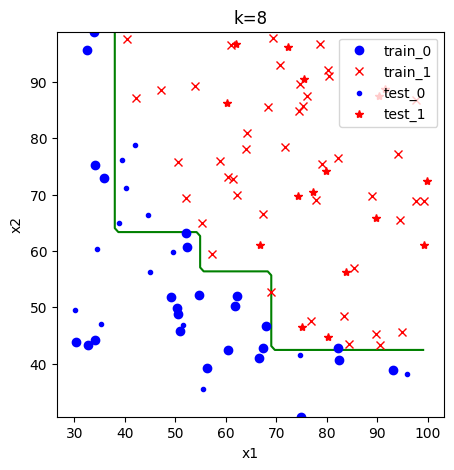

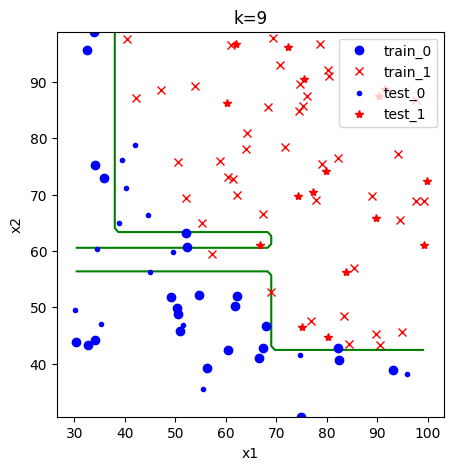

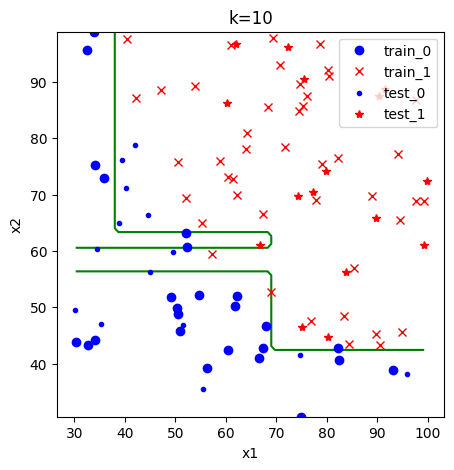

In [ ]:


for lvl in [1,2, 3, 4, 5, 6, 7, 8, 9, 10]:

    # setup plot
    plt.figure(figsize=(5, 5))
    plt.title(f'k={lvl}')
    plt.xlabel('x1')
    plt.ylabel('x2')
 
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    
    labels_space = decision_tree.predict(x1x2_range_comb)
    labels_space = labels_space.reshape(x2_res, x1_res)
    # y_pred = decision_tree.predict(x_test)
    # labels_space= y_pred
    # for row_idx in range(x2_res):
    #    for col_idx in range(x1_res):
    #        example = np.array([x1[col_idx], x2[row_idx]])
    #        pred = classify(x_train, y_train, example, k)
    # labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
 
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
 
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
 
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])







    


In [169]:
for lvl in [1,2, 3, 4, 5, 6, 7, 8, 9, 10]:

    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    
    y_pred = decision_tree.predict(x_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    rep = classification_report(y_test,y_pred)
    print(f"Dla k = {lvl}")
    print(rep)

Dla k = 1
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        14
         1.0       0.69      0.69      0.69        16

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Dla k = 2
              precision    recall  f1-score   support

         0.0       0.88      0.50      0.64        14
         1.0       0.68      0.94      0.79        16

    accuracy                           0.73        30
   macro avg       0.78      0.72      0.71        30
weighted avg       0.77      0.73      0.72        30

Dla k = 3
              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75        14
         1.0       0.75      0.94      0.83        16

    accuracy                           0.80        30
   macro avg       0.82      0.79      0.79        30
weighted avg       0.82      0.80      0.79 